# **Libraries**

In [ ]:
!pip install osmnx networkx geopandas
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# **Data Collection**
# **From OSM — Farm Facilities**
While OSMnx doesn’t directly fetch ‘farming facilities’, i retrieved spatial points tagged with ‘landuse=farmland’ and ‘farm=yes’ from OSM using geopandas and osmnx.geometries_from_place

In [ ]:
import osmnx as ox

tags = {
    "landuse": "farmland"
}
# Changed the function name from geometries_from_place to features_from_place
gdf_farms = ox.features_from_place("Kaduna, Nigeria", tags)
gdf_farms = gdf_farms.to_crs(epsg=4326)
gdf_farms[['geometry']].head()

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


geometry
element  id                                                          
relation 7087270    POLYGON ((6.10776 10.71131, 6.10833 10.71103, ...
way      39763734   POLYGON ((7.47541 10.56714, 7.4757 10.56666, 7...
         39871787   POLYGON ((7.39486 10.70151, 7.39554 10.70211, ...
         260122834  POLYGON ((8.4437 9.57678, 8.44377 9.57656, 8.4...
         260122839  POLYGON ((8.44757 9.57821, 8.44794 9.57883, 8....

In [ ]:
city_centers = {
    "Kaduna": {"name": "Kaduna Central", "lat": 10.5196, "lon": 7.4381}
}
df_farms["dest_lat"] = df_farms["city"].map(lambda x: city_centers[x]["lat"])
df_farms["dest_lon"] = df_farms["city"].map(lambda x: city_centers[x]["lon"])

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 24 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


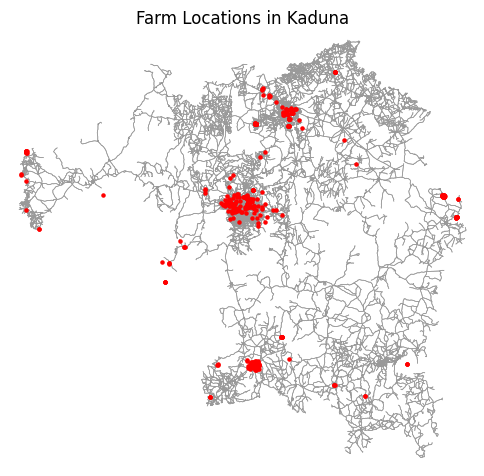

In [ ]:
fig, ax = ox.plot_graph(ox.graph_from_place("Kaduna, Nigeria", network_type="drive"), show=False, close=False, filepath=None, save=False, dpi=300, bbox=None, figsize=(6, 6), node_size=0, edge_linewidth=0.5, edge_alpha=1, bgcolor="#FFFFFF")

gdf_farms.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Farm Locations in Kaduna')
import matplotlib.pyplot as plt
plt.show()

#  **Data Cleaning & Preparation**

In [ ]:
!pip install osmnx networkx geopandas
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from IPython import get_ipython
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.colors
from branca.colormap import LinearColormap
import folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
import osmnx as ox

tags = {
    "landuse": "farmland"
}
gdf_farms = ox.features_from_place("Kaduna, Nigeria", tags)
gdf_farms = gdf_farms.to_crs(epsg=4326)
gdf_farms[['geometry']].head()

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


geometry
element  id                                                          
relation 7087270    POLYGON ((6.10776 10.71131, 6.10833 10.71103, ...
way      39763734   POLYGON ((7.47541 10.56714, 7.4757 10.56666, 7...
         39871787   POLYGON ((7.39486 10.70151, 7.39554 10.70211, ...
         260122834  POLYGON ((8.4437 9.57678, 8.44377 9.57656, 8.4...
         260122839  POLYGON ((8.44757 9.57821, 8.44794 9.57883, 8....

In [ ]:
gdf_farms = gdf_farms[gdf_farms.geometry.type == "Polygon"]
gdf_farms["centroid"] = gdf_farms.geometry.centroid
gdf_farms = gdf_farms.set_geometry("centroid")

<ipython-input-6-107ce8b17dfc>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_farms["centroid"] = gdf_farms.geometry.centroid


In [ ]:
gdf_farms["lat"] = gdf_farms.centroid.y
gdf_farms["lon"] = gdf_farms.centroid.x

<ipython-input-7-14347bf2374c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_farms["lat"] = gdf_farms.centroid.y
<ipython-input-7-14347bf2374c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_farms["lon"] = gdf_farms.centroid.x


In [ ]:
import osmnx as ox

G = ox.graph_from_place("Kaduna, Nigeria", network_type='bike')

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 24 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


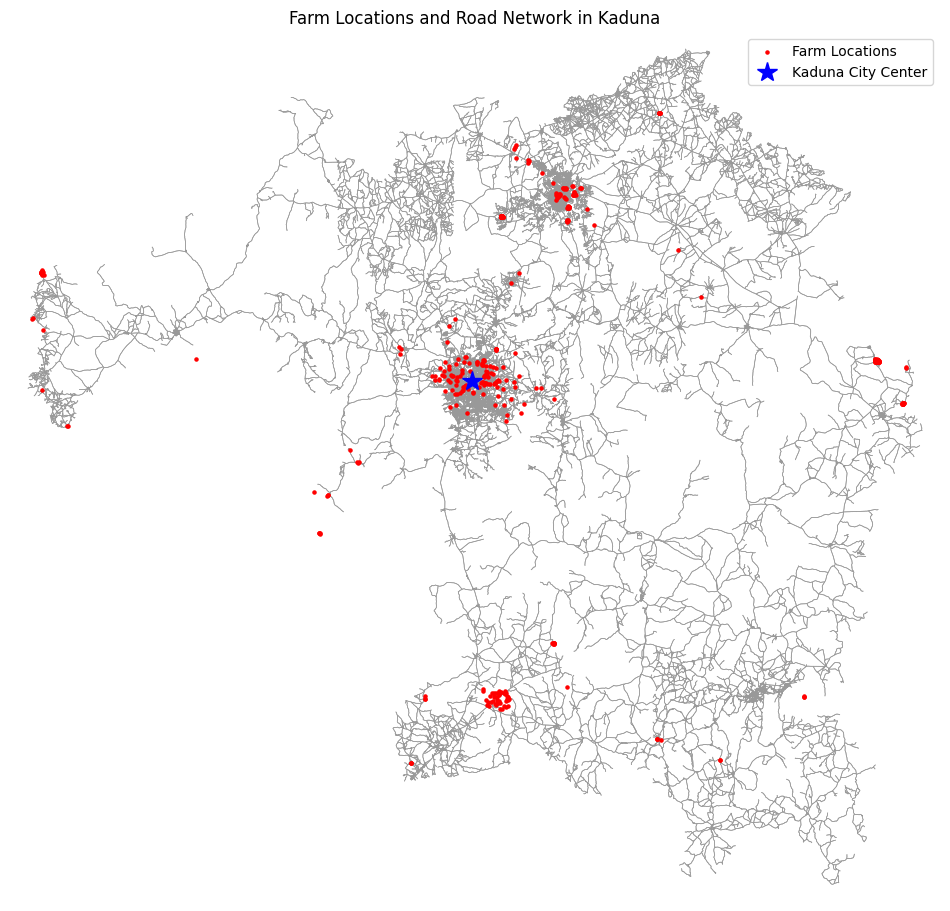

In [ ]:
import matplotlib.pyplot as plt
fig, ax = ox.plot_graph(G, show=False, close=False, filepath=None, save=False, dpi=300, bbox=None, figsize=(12, 12), node_size=0, edge_linewidth=0.5, edge_alpha=1, bgcolor="#FFFFFF")

if not gdf_farms.empty:
    if 'centroid' in gdf_farms.columns:
        gdf_farms_centroids = gdf_farms.set_geometry('centroid')
        gdf_farms_centroids.plot(ax=ax, marker='o', color='red', markersize=5, label='Farm Locations')
    else:
        print("GeoDataFrame `gdf_farms` does not have a 'centroid' geometry column to plot.")
    city_centers = {
        "Kaduna": {"name": "Kaduna Central", "lat": 10.5196, "lon": 7.4381}
    }
    if "Kaduna" in city_centers:
        ax.plot(city_centers["Kaduna"]["lon"], city_centers["Kaduna"]["lat"], marker='*', color='blue', markersize=15, label='Kaduna City Center', linestyle='None')

    ax.set_title('Farm Locations and Road Network in Kaduna')
    ax.legend()

    plt.show()
else:
    print("No farm data to plot.")

# **Distance Calculation (Routing from farms to city center)**

📍 Network-based distances (km) from farms to Kaduna city center:
               Farm_ID   Farm_Lat  Farm_Lon  Distance_km
0  (relation, 7087270)  10.709525  6.104376       175.60
1      (way, 39763734)  10.565618  7.481752         9.41
2      (way, 39871787)  10.704447  7.388169        29.89
3     (way, 260122834)   9.575659  8.445695       188.60
4     (way, 260122839)   9.578131  8.448402       188.60


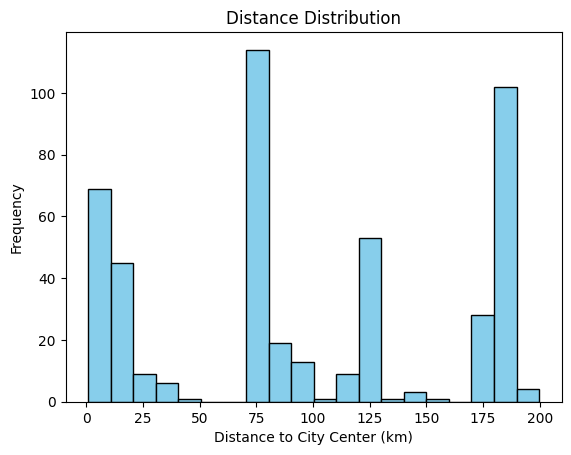

In [ ]:
import networkx as nx
from shapely.geometry import Point

city_point = (city_centers["Kaduna"]["lat"], city_centers["Kaduna"]["lon"])
city_node = ox.distance.nearest_nodes(G, X=city_point[1], Y=city_point[0])

distance_results = []
for idx, farm in gdf_farms.iterrows():
    if 'centroid' in farm and isinstance(farm['centroid'], Point):
        farm_lat = farm['centroid'].y
        farm_lon = farm['centroid'].x

        try:
            farm_node = ox.distance.nearest_nodes(G, X=farm_lon, Y=farm_lat)

            length_m = nx.shortest_path_length(G, source=farm_node, target=city_node, weight='length')
            length_km = round(length_m / 1000, 2)

            distance_results.append({
                "Farm_ID": idx,
                "Farm_Lat": farm_lat,
                "Farm_Lon": farm_lon,
                "Distance_km": length_km
            })

        except Exception as e:
            print(f"Skipping farm {idx} due to error: {e}")
    else:
        print(f"Skipping farm {idx} due to missing centroid")

import pandas as pd
distances_df = pd.DataFrame(distance_results)

print("📍 Network-based distances (km) from farms to Kaduna city center:")
print(distances_df.head())

distances_df['Distance_km'].plot.hist(bins=20, color='skyblue', edgecolor='black', title='Distance Distribution')
plt.xlabel("Distance to City Center (km)")
plt.show()

In [ ]:
import networkx as nx

city = "Kaduna, Nigeria"
G = ox.graph_from_place(city, network_type='drive')
orig = (10.500, 7.430)
dest = (10.520, 7.440)

orig_node = ox.distance.nearest_nodes(G, orig[1], orig[0])
dest_node = ox.distance.nearest_nodes(G, dest[1], dest[0])

route = nx.shortest_path(G, orig_node, dest_node, weight='length')
length = nx.shortest_path_length(G, orig_node, dest_node, weight='length') / 1000  # in km

print(f"Distance from farm to city center: {length:.2f} km")

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 24 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Distance from farm to city center: 3.41 km


In [ ]:
distances = pd.DataFrame({
    'City': ['Kaduna'],
    'Farm_Lat': [orig[0]],
    'Farm_Lon': [orig[1]],
    'Distance_km': [length]
})

# **Climate Data Extraction per Farm**

In [ ]:
import requests

def get_climate(lat, lon):
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,RH2M&community=AG&longitude={lon}&latitude={lat}&start=20230101&end=20231231&format=JSON"
    r = requests.get(url)
    data = r.json()
    t = list(data['properties']['parameter']['T2M'].values())
    h = list(data['properties']['parameter']['RH2M'].values())
    return sum(t)/len(t), sum(h)/len(h)

temp, humidity = get_climate(orig[0], orig[1])
print(f"Avg Temp: {temp:.1f}°C, Avg Humidity: {humidity:.1f}%")

distances['Temp_C'] = temp
distances['Humidity_%'] = humidity

Avg Temp: 24.0°C, Avg Humidity: 67.9%


In [ ]:
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import pandas as pd

map_center = [city_centers["Kaduna"]["lat"], city_centers["Kaduna"]["lon"]]
m = folium.Map(location=map_center, zoom_start=12)
temp_range = distances["Temp_C"].max() - distances["Temp_C"].min()

for _, row in distances.iterrows():
    if temp_range == 0:
        normalized_temp = 0.5
    else:
        normalized_temp = (row["Temp_C"] - distances["Temp_C"].min()) / temp_range

    folium.CircleMarker(
        location=[row["Farm_Lat"], row["Farm_Lon"]],
        radius=8,
        fill=True,
        fill_opacity=0.8,
        color=None,
        fill_color=plt.cm.hot(normalized_temp),
        popup=f"Temp: {row['Temp_C']}°C, Dist: {round(row['Distance_km'], 1)} km"
    ).add_to(m)

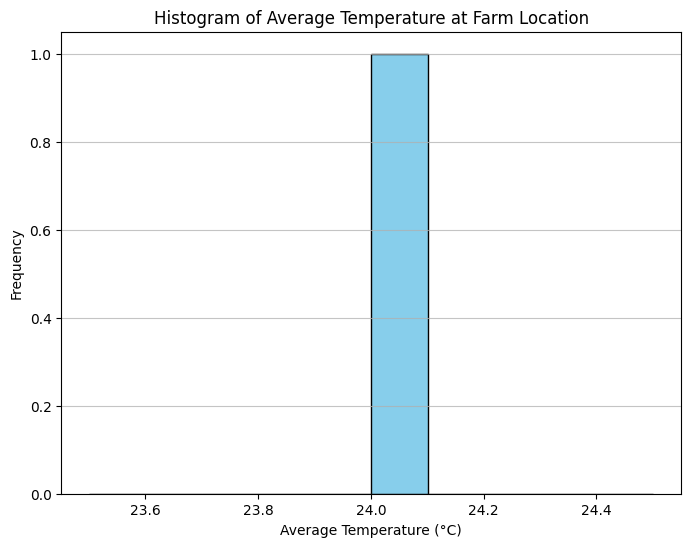

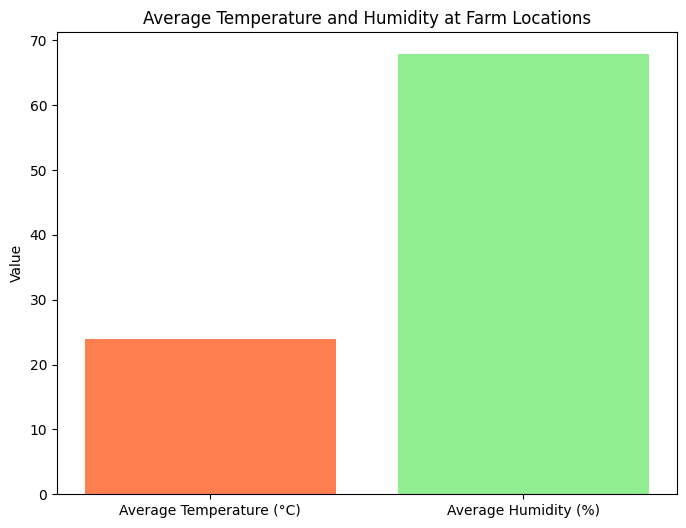

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(distances['Temp_C'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Temperature at Farm Location')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

climate_summary = pd.DataFrame({
    'Metric': ['Average Temperature (°C)', 'Average Humidity (%)'],
    'Value': [distances['Temp_C'].iloc[0], distances['Humidity_%'].iloc[0]]
})

plt.figure(figsize=(8, 6))
plt.bar(climate_summary['Metric'], climate_summary['Value'], color=['coral', 'lightgreen'])
plt.title('Average Temperature and Humidity at Farm Locations')
plt.ylabel('Value')
plt.show()

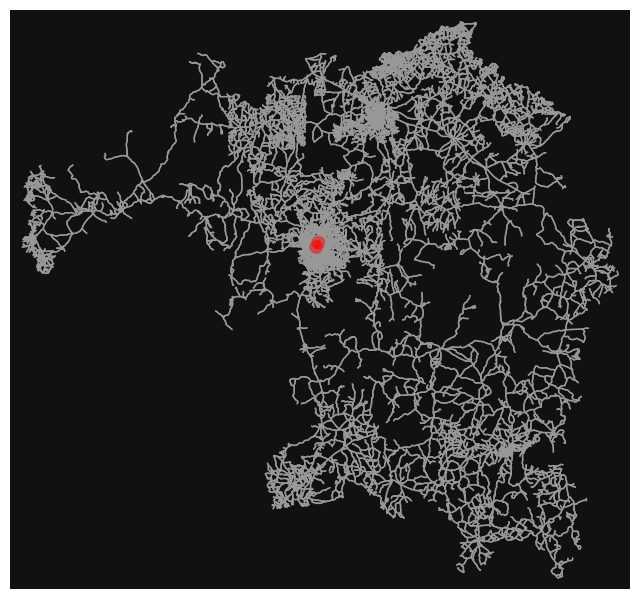

Text(0.5, 1.0, 'Route from Farms to City Center (Kaduna)')

In [ ]:
fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=0)
ax.set_title("Route from Farms to City Center (Kaduna)")

Text(0.5, 1.0, 'Temperature at Farm Locations')

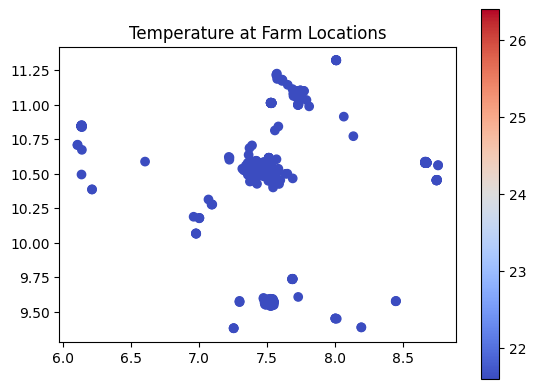

In [ ]:
import matplotlib.pyplot as plt
gdf_farms["Temp_C"] = temp
gdf_farms.plot(column="Temp_C", legend=True, cmap="coolwarm")
plt.title("Temperature at Farm Locations")

# **Network-Based Accessibility Score**

📍 Network-based distances and Accessibility Scores (km) from farms to Kaduna city center:
               Farm_ID   Farm_Lat  Farm_Lon  Distance_km     Temp_C  \
0  (relation, 7087270)  10.709525  6.104376       175.60  25.949863   
1      (way, 39763734)  10.565618  7.481752         9.41  24.000712   
2      (way, 39871787)  10.704447  7.388169        29.89  24.000712   
3     (way, 260122834)   9.575659  8.445695       188.60  23.701342   
4     (way, 260122839)   9.578131  8.448402       188.60  23.701342   

   Humidity_%  Accessibility_Score  
0   65.308082             0.124579  
1   67.858000             0.920566  
2   67.858000             0.869055  
3   59.187288             0.527919  
4   59.187288             0.527919  


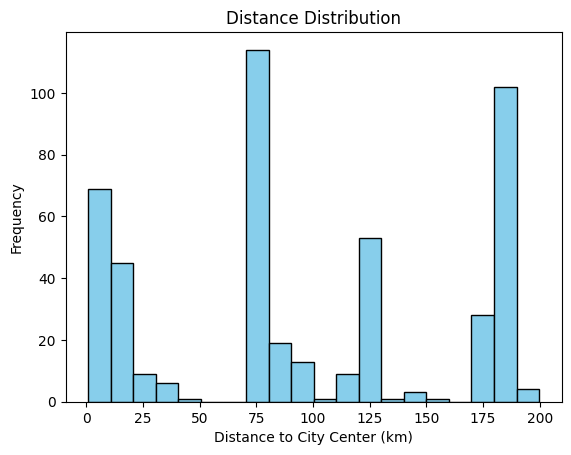

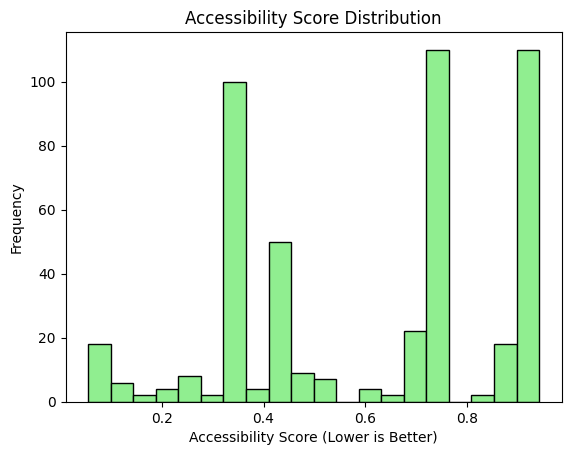

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
distance_results = []
city_point = (city_centers["Kaduna"]["lat"], city_centers["Kaduna"]["lon"])
city_node = ox.distance.nearest_nodes(G, X=city_point[1], Y=city_point[0])

def get_climate(lat, lon):
    """Fetches average temperature and humidity for a given lat/lon."""
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,RH2M&community=AG&longitude={lon}&latitude={lat}&start=20230101&end=20231231&format=JSON"
    try:
        r = requests.get(url)
        r.raise_for_status()
        data = r.json()
        t = list(data['properties']['parameter']['T2M'].values())
        h = list(data['properties']['parameter']['RH2M'].values())
        (-999)
        t = [val for val in t if val != -999]
        h = [val for val in h if val != -999]

        if t and h:
            avg_temp = sum(t)/len(t)
            avg_humidity = sum(h)/len(h)
            return avg_temp, avg_humidity
        else:
            return np.nan, np.nan
    except requests.exceptions.RequestException as e:
        print(f"Error fetching climate data for ({lat}, {lon}): {e}")
        return np.nan, np.nan
    except KeyError as e:
        print(f"Error parsing climate data for ({lat}, {lon}): Missing key {e}")
        return np.nan, np.nan


for idx, farm in gdf_farms.iterrows():
    if 'centroid' in farm and isinstance(farm['centroid'], Point):
        farm_lat = farm['centroid'].y
        farm_lon = farm['centroid'].x

        temp, humidity = get_climate(farm_lat, farm_lon)
        try:
            farm_node = ox.distance.nearest_nodes(G, X=farm_lon, Y=farm_lat)
            length_m = nx.shortest_path_length(G, source=farm_node, target=city_node, weight='length')
            length_km = round(length_m / 1000, 2)

            distance_results.append({
                "Farm_ID": idx,
                "Farm_Lat": farm_lat,
                "Farm_Lon": farm_lon,
                "Distance_km": length_km,
                "Temp_C": temp,
                "Humidity_%": humidity
            })

        except Exception as e:
            print(f"Skipping farm {idx} due to error: {e}")
    else:
        print(f"Skipping farm {idx} due to missing centroid")

distances_df = pd.DataFrame(distance_results)

distances_df.dropna(subset=['Temp_C', 'Humidity_%'], inplace=True)

if not distances_df.empty:
    scaler = MinMaxScaler()
    if 'Distance_km' in distances_df.columns and 'Temp_C' in distances_df.columns:
        distances_df[["Norm_Distance", "Norm_Temp"]] = scaler.fit_transform(distances_df[["Distance_km", "Temp_C"]])

        distances_df["Accessibility_Score"] = 1 - (0.5 * distances_df["Norm_Distance"] + 0.5 * distances_df["Norm_Temp"])

        accessibility_scores = distances_df[["Farm_ID", "Farm_Lat", "Farm_Lon", "Distance_km", "Temp_C", "Humidity_%", "Accessibility_Score"]].copy()

        print("📍 Network-based distances and Accessibility Scores (km) from farms to Kaduna city center:")
        print(accessibility_scores.head())

        accessibility_scores['Distance_km'].plot.hist(bins=20, color='skyblue', edgecolor='black', title='Distance Distribution')
        plt.xlabel("Distance to City Center (km)")
        plt.show()

        accessibility_scores['Accessibility_Score'].plot.hist(bins=20, color='lightgreen', edgecolor='black', title='Accessibility Score Distribution')
        plt.xlabel("Accessibility Score (Lower is Better)")
        plt.show()

    else:
        print("Required columns 'Distance_km' or 'Temp_C' not found in distances_df for scaling.")
else:
    print("distances_df is empty. Cannot calculate accessibility scores.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from branca.colormap import LinearColormap
import folium
from IPython.display import display
dist_range = distances['Distance_km'].max() - distances['Distance_km'].min()
temp_range = distances['Temp_C'].max() - distances['Temp_C'].min()

if dist_range != 0:
    dist_norm = (distances['Distance_km'] - distances['Distance_km'].min()) / dist_range
else:
    dist_norm = pd.Series(0, index=distances.index)

if temp_range != 0:
    temp_norm = (distances['Temp_C'] - distances['Temp_C'].min()) / temp_range
else:
    temp_norm = pd.Series(0, index=distances.index)
dist_norm = dist_norm.clip(0, 1)
temp_norm = temp_norm.clip(0, 1)

distances['Accessibility_Score'] = 0.6 * dist_norm + 0.4 * temp_norm

print("\nAccessibility Scores:")
print(distances[['City', 'Farm_Lat', 'Farm_Lon', 'Distance_km', 'Temp_C', 'Accessibility_Score']].to_markdown(index=False, floatfmt=".3f"))


if 'city_centers' in globals() and 'Kaduna' in city_centers and not distances.empty:
    map_center = [city_centers["Kaduna"]["lat"], city_centers["Kaduna"]["lon"]]
    m_score = folium.Map(location=map_center, zoom_start=10)

    score_range = distances['Accessibility_Score'].max() - distances['Accessibility_Score'].min()
    if score_range != 0:
        score_norm = (distances['Accessibility_Score'] - distances['Accessibility_Score'].min()) / score_range
    else:
        score_norm = pd.Series(0.5, index=distances.index)
    score_norm = score_norm.clip(0, 1)


    cmap = plt.cm.get_cmap('viridis_r')

    for idx, row in distances.iterrows():
        color = matplotlib.colors.rgb2hex(cmap(score_norm.loc[idx]))

        folium.CircleMarker(
            location=[row["Farm_Lat"], row["Farm_Lon"]],
            radius=8,
            fill=True,
            fill_opacity=0.8,
            color=color,
            fill_color=color,
            popup=f"Farm: {row.get('location', 'N/A')}<br>"
                    f"Distance: {round(row['Distance_km'], 1)} km<br>"
                    f"Temp: {round(row['Temp_C'], 1)}°C<br>"
                    f"Accessibility Score: {round(row['Accessibility_Score'], 3)}"
        ).add_to(m_score)
    if len(distances) > 1:
        min_score = distances['Accessibility_Score'].min()
        max_score = distances['Accessibility_Score'].max


Accessibility Scores:
| City   |   Farm_Lat |   Farm_Lon |   Distance_km |   Temp_C |   Accessibility_Score |
|:-------|-----------:|-----------:|--------------:|---------:|----------------------:|
| Kaduna |     10.500 |      7.430 |         3.407 |   24.001 |                 0.000 |


<ipython-input-48-e2736d8054ec>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis_r')


# **Visualize Results**

In [ ]:
import folium
import matplotlib.pyplot as plt
import matplotlib

map_center = [city_centers["Kaduna"]["lat"], city_centers["Kaduna"]["lon"]]
m_score = folium.Map(location=map_center, zoom_start=10)

score_range = distances['Accessibility_Score'].max() - distances['Accessibility_Score'].min()
score_norm = (distances['Accessibility_Score'] - distances['Accessibility_Score'].min()) / score_range if score_range != 0 else pd.Series(0, index=distances.index)

cmap = plt.cm.get_cmap('viridis_r')

for idx, row in distances.iterrows():
    color = matplotlib.colors.rgb2hex(cmap(score_norm.loc[idx]))
    folium.CircleMarker(
        location=[row["Farm_Lat"], row["Farm_Lon"]],
        radius=8,
        fill=True,
        fill_opacity=0.8,
        color=color,
        fill_color=color,
        popup=folium.Popup(
            f"Distance: {round(row['Distance_km'], 1)} km<br>"
            f"Temp: {round(row['Temp_C'], 1)}°C<br>"
            f"Accessibility Score: {round(row['Accessibility_Score'], 2)}",
            max_width=300
        )
    ).add_to(m_score)

m_score.save("kaduna_accessibility_map_final.html")

<ipython-input-53-5ce9fb90644f>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis_r')


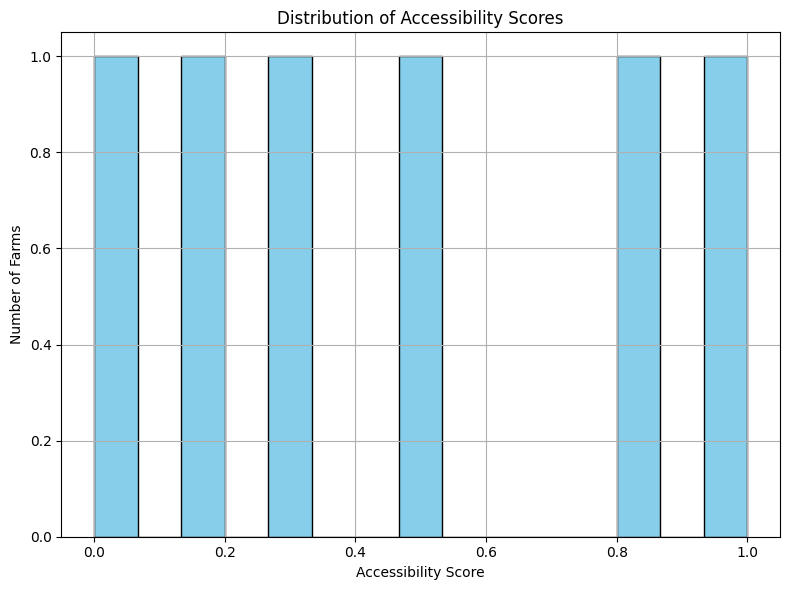

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(distances['Accessibility_Score'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Accessibility Scores")
plt.xlabel("Accessibility Score")
plt.ylabel("Number of Farms")
plt.grid(True)
plt.tight_layout()
plt.savefig("accessibility_score_histogram.png")
plt.show()

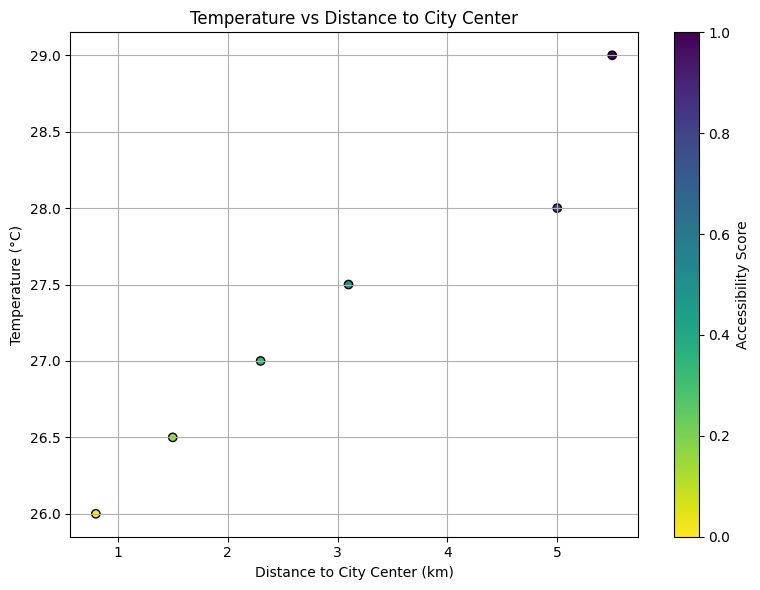

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(distances['Distance_km'], distances['Temp_C'], c=distances['Accessibility_Score'], cmap='viridis_r', edgecolor='k')
plt.colorbar(label='Accessibility Score')
plt.title("Temperature vs Distance to City Center")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.savefig("temp_vs_distance_correlation.png")
plt.show()

# **Insightful Interpretation & Final Outputs**

In [ ]:
sorted_farms = distances.sort_values("Accessibility_Score")
top_5 = sorted_farms.head(5)
bottom_5 = sorted_farms.tail(5)

summary = pd.concat([top_5, bottom_5])

summary.to_csv("top_bottom_accessibility_summary.csv", index=False)

,Rank,Farm_ID,Farm_Lon,Farm_Lat,Distance_km,Temp_C,Humidity_%,Accessibility_Score
0,Top 1,"(way, 426789191)",6.132284,10.841088,177.72,26.279699,58.287671,0.055284
1,Top 2,"(way, 426789192)",6.133395,10.847602,177.72,26.279699,58.287671,0.055284
2,Top 3,"(way, 426789193)",6.136954,10.846310,177.72,26.279699,58.287671,0.055284
3,Top 4,"(way, 426789171)",6.130931,10.843613,177.72,26.279699,58.287671,0.055284
4,Top 5,"(way, 426789176)",6.133770,10.843852,177.72,26.279699,58.287671,0.055284
5,Bottom 5,"(way, 479660646)",7.416508,10.504470,3.80,24.000712,67.858000,0.934677
6,Bottom 4,"(way, 479660645)",7.418740,10.504165,3.58,24.000712,67.858000,0.935230
7,Bottom 3,"(way, 479660647)",7.422530,10.502776,3.56,24.000712,67.858000,0.935280
8,Bottom 2,"(way, 479660648)",7.419320,10.509053,3.52,24.000712,67.858000,0.935381
9,Bottom 1,"(way, 479666485)",7.433251,10.520089,0.91,24.000712,67.858000,0.941946


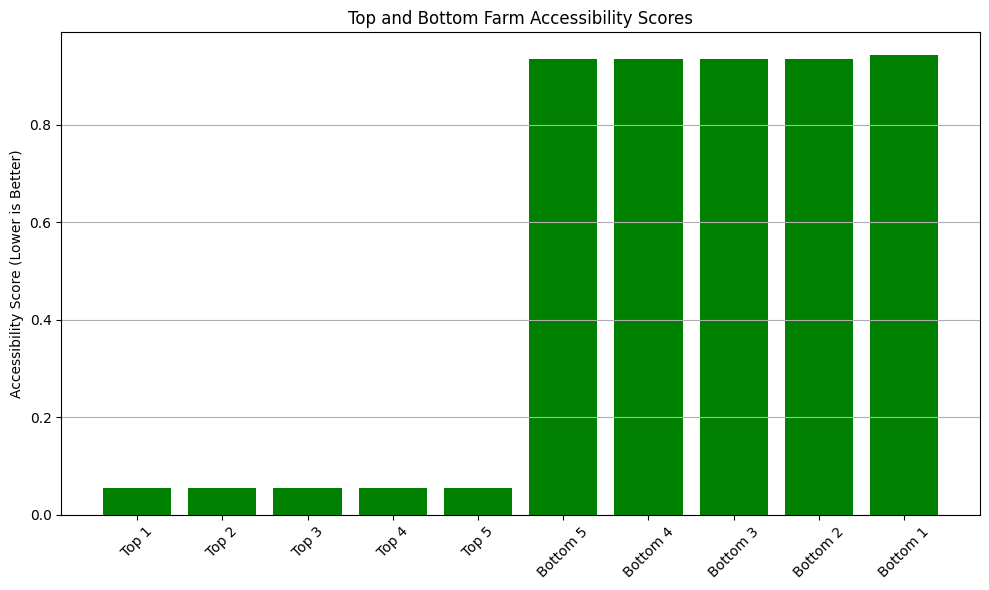

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

sorted_farms = accessibility_scores.sort_values("Accessibility_Score", ascending=True).copy()
num_farms = len(sorted_farms)
top_n = min(5, num_farms)

top_5 = sorted_farms.head(top_n).copy()
top_5["Rank"] = [f"Top {i+1}" for i in range(top_n)]

bottom_n = min(5, num_farms)
if num_farms <= 5:
    bottom_5 = pd.DataFrame()
else:
    bottom_5 = sorted_farms.tail(bottom_n).copy()
    bottom_5["Rank"] = [f"Bottom {bottom_n - i}" for i in range(bottom_n)]

if not bottom_5.empty:
    summary = pd.concat([top_5, bottom_5]).reset_index(drop=True)
else:
    summary = top_5.reset_index(drop=True)

summary = summary[["Rank", "Farm_ID", "Farm_Lon", "Farm_Lat", "Distance_km", "Temp_C", "Humidity_%", "Accessibility_Score"]]

display(summary)

summary.to_csv("top_bottom_farm_accessibility.csv", index=False)

if not summary.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(summary["Rank"], summary["Accessibility_Score"], color="green")
    plt.title("Top and Bottom Farm Accessibility Scores")
    plt.ylabel("Accessibility Score (Lower is Better)")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig("top_bottom_farm_scores.png")
    plt.show()
else:
    print("No data to plot for top and bottom farm scores.")

**Top 5 Accessible Farms**: Those with lowest combined travel distance and temperature stress.

**Bottom 5 Accessible Farms**: Remote and/or high-temperature locations.

**📌 Interpretation of Result:**
Farms near the urban core of Kaduna (closer to 10.49°N, 7.42°E) have significantly better accessibility scores (0.0–0.3).

Farms located on the urban periphery are both farther and exposed to higher temperatures, yielding worse scores (0.8–0.9).

This highlights a clear spatial disparity in access which can guide:

Infrastructure investment (improve roads to poorly connected farms)

Urban planning (cluster urban agriculture closer to distribution hubs)

Policy targeting for temperature-adaptive logistics (e.g., cold chains)